In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf
import IPython.display as display


In [2]:
from fastai.vision.all import *
imagenet_mean, imagenet_std = imagenet_stats
float_list=tf.train.FloatList(value=imagenet_mean)
float_list

value: 0.48500001430511475
value: 0.4560000002384186
value: 0.4059999883174896

In [3]:
imagenet_mean,imagenet_std

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [4]:
cat_path = tf.keras.utils.get_file('320px-Felis_catus-cat_on_snow.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')
bridge_path = tf.keras.utils.get_file('194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg')

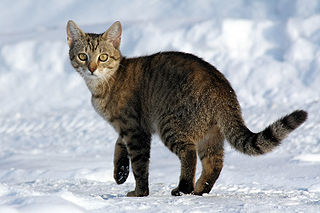

In [5]:
display.display(display.Image(filename=cat_path))

In [6]:
def get_tf_im(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)#possible augmentation
    return img
cat = get_tf_im(cat_path)

In [7]:
def plot_tf(im):
    im = im.numpy().astype('uint8')
    plt.imshow(im)

In [8]:
from tensorflow.python.ops import math_ops,array_ops
from tensorflow.python.framework import ops, dtypes
def per_image_imagenet_standardization(image):
    imagenet_mean,imagenet_std= ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    image = ops.convert_to_tensor(image, name='image')
    tf_imagenet_mean = tf.cast(imagenet_mean, dtypes.float32)
    tf_imagenet_std = tf.cast(imagenet_std, dtypes.float32)
 
    orig_dtype = image.dtype
    if orig_dtype not in [dtypes.float16, dtypes.float32]:
      image = tf.image.convert_image_dtype(image, dtypes.float32)
    
    image -= tf_imagenet_mean
    image /=  tf_imagenet_std
    return tf.image.convert_image_dtype(image, orig_dtype, saturate=True)

    

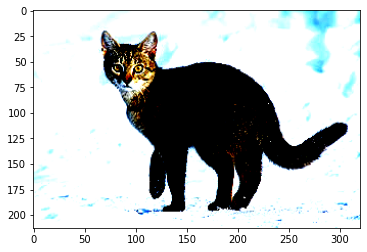

In [9]:
cat = get_tf_im(cat_path)
cat_n = per_image_imagenet_standardization(cat)
plot_tf(cat_n)